In [54]:
import pandas as pd

# Read the data into a DataFrame
data = pd.read_csv('fake_job_postings.csv')

# Inspect the data
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [55]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (fill in or drop rows/columns)
# For example, to drop rows with any missing values:
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Text preprocessing
# For example, lowercasing text data
data['description'] = data['description'].str.lower()

# Final check
print(data.info())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 6 to 17865
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               774 non-null    int64 
 1   title                774 non-null    object
 2   location             774 non-null    object
 3   department           774 non-null    object
 4   salary_range         774 non-null    object
 5   company_profile

In [56]:
# Replace NaN values in 'salary_range' column with 0
data['salary_range'].fillna(0, inplace=True)

# Create new columns 'salary_lower' and 'salary_upper'
data['salary_lower'] = data['salary_range'].apply(lambda x: float(x.split('-')[0]) if '-' in str(x) else 0)
data['salary_upper'] = data['salary_range'].apply(lambda x: float(x.split('-')[1]) if '-' in str(x) else 0)


In [57]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary_lower,salary_upper
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",your responsibilities: manage the english-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000.0,28000.0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,about vault dragon vault dragon is dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,120000.0,150000.0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#url_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,100000.0,120000.0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"ic&amp;e technician | bakersfield, ca mt. poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,95000.0,115000.0
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,the job is to support the growth of the #url_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0,15000.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,balanced labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,80000.0,100000.0


In [58]:
data.drop(columns=['salary_range'], inplace=True)
data

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary_lower,salary_upper
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",your responsibilities: manage the english-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000.0,28000.0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,Jungle Ventures is the leading Singapore based...,about vault dragon vault dragon is dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,120000.0,150000.0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,"WDM Group is an innovative, forward thinking d...",#url_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,100000.0,120000.0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,...,"ic&amp;e technician | bakersfield, ca mt. poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,95000.0,115000.0
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,Renewable Energy and Environmental Protection ...,the job is to support the growth of the #url_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0,15000.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17849,17850,Communication Designer,"US, CA, San Francisco",Design,Balanced Labs exists to provide accountants an...,balanced labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,80000.0,100000.0


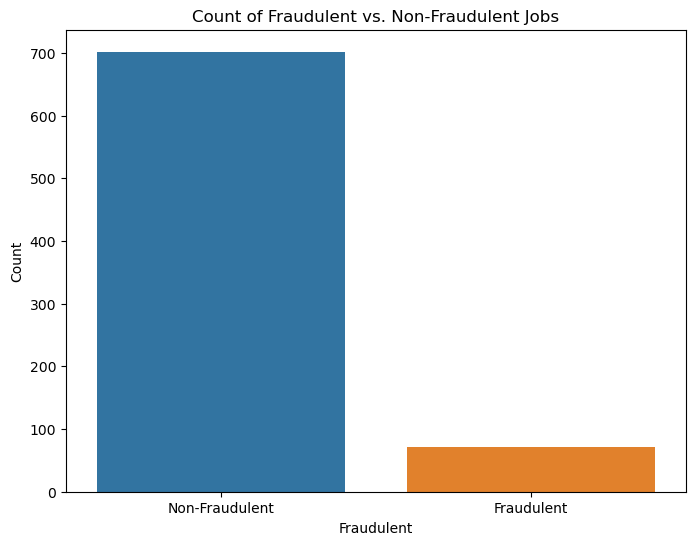

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot comparing count of fraudulent and non-fraudulent jobs
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=data)
plt.title('Count of Fraudulent vs. Non-Fraudulent Jobs')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()



In [60]:
data['employment_type'].fillna('No Data', inplace=True)
data['required_experience'].fillna('No Data', inplace=True)
data['required_education'].fillna('No Data', inplace=True)
data['industry'].fillna('No Data', inplace=True)
data['function'].fillna('No Data', inplace=True)

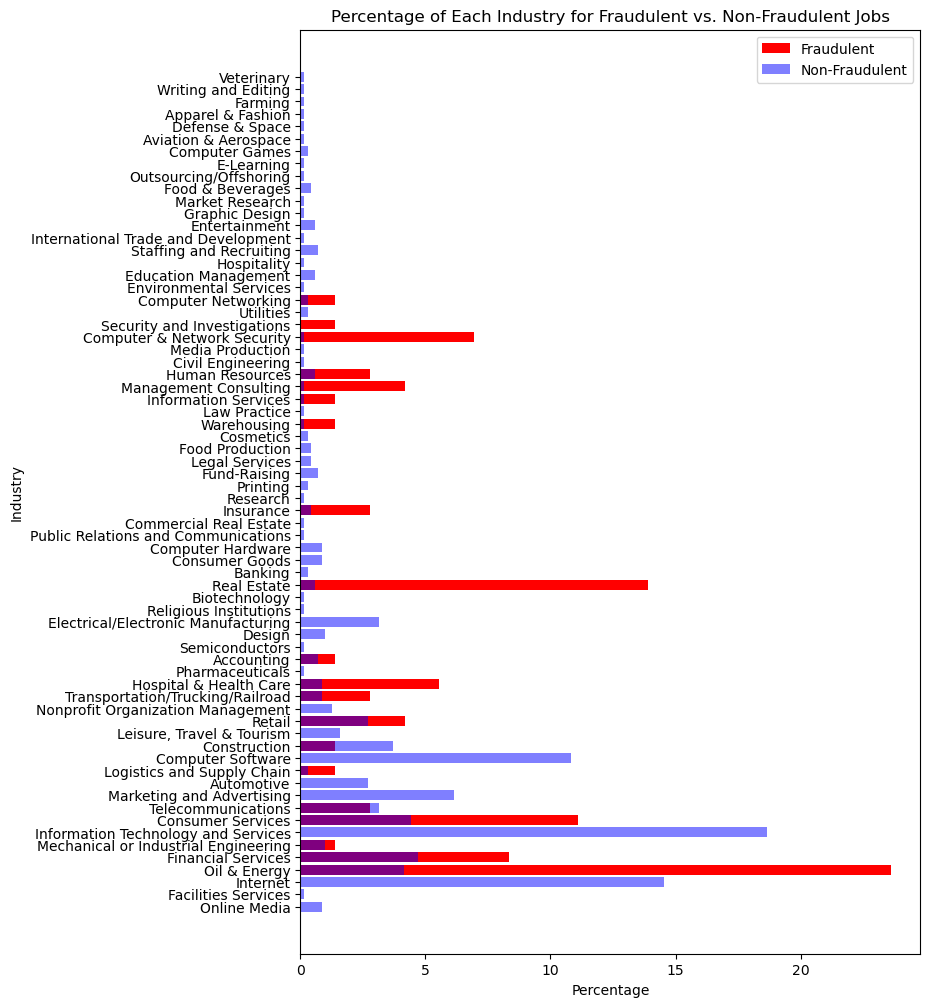

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique industries in the data
unique_industries = data['industry'].unique()

# Initialize lists to store percentages
fraudulent_percentages = []
non_fraudulent_percentages = []

# Calculate the percentage of each industry within fraudulent and non-fraudulent job postings
for industry in unique_industries:
    fraudulent_percentage = (data[(data['fraudulent'] == 1) & (data['industry'] == industry)].shape[0] / data[data['fraudulent'] == 1].shape[0]) * 100
    non_fraudulent_percentage = (data[(data['fraudulent'] == 0) & (data['industry'] == industry)].shape[0] / data[data['fraudulent'] == 0].shape[0]) * 100
    fraudulent_percentages.append(fraudulent_percentage)
    non_fraudulent_percentages.append(non_fraudulent_percentage)

# Create a bar plot
plt.figure(figsize=(8, 12))
plt.barh(unique_industries, fraudulent_percentages, color='red', label='Fraudulent')
plt.barh(unique_industries, non_fraudulent_percentages, color='blue', alpha=0.5, label='Non-Fraudulent')
plt.title('Percentage of Each Industry for Fraudulent vs. Non-Fraudulent Jobs')
plt.ylabel('Industry')
plt.xlabel('Percentage')
plt.legend()
plt.show()



by percentage, fake jobs seem to be mostly conputer and network security, real estate, hospital and health care, retail, transportation, insurance, consumer service, financial services, oil; and energy.

In [62]:
# Get unique industries for fraudulent and non-fraudulent jobs
fraudulent_industries = set(data[data['fraudulent'] == 1]['industry'])
non_fraudulent_industries = set(data[data['fraudulent'] == 0]['industry'])

# Find industries unique to fraudulent jobs
unique_fraudulent_industries = fraudulent_industries - non_fraudulent_industries

print("Unique industries found only in fraudulent jobs:")
print(unique_fraudulent_industries)

Unique industries found only in fraudulent jobs:
{'Security and Investigations'}


In [63]:
# Get unique industries for fraudulent and non-fraudulent jobs
fraudulent_industries = set(data[data['fraudulent'] == 1]['industry'])
non_fraudulent_industries = set(data[data['fraudulent'] == 0]['industry'])

# Find industries unique to non-fraudulent jobs
unique_non_fraudulent_industries = non_fraudulent_industries - fraudulent_industries

print("Unique industries found only in non-fraudulent jobs:")
print(unique_non_fraudulent_industries)

Unique industries found only in non-fraudulent jobs:
{'Marketing and Advertising', 'Fund-Raising', 'E-Learning', 'Food Production', 'Computer Hardware', 'Hospitality', 'International Trade and Development', 'Food & Beverages', 'Public Relations and Communications', 'Biotechnology', 'Legal Services', 'Research', 'Outsourcing/Offshoring', 'Graphic Design', 'Computer Games', 'Commercial Real Estate', 'Utilities', 'Education Management', 'Media Production', 'Defense & Space', 'Computer Software', 'Entertainment', 'Veterinary', 'Banking', 'Environmental Services', 'Electrical/Electronic Manufacturing', 'Consumer Goods', 'Printing', 'Writing and Editing', 'Semiconductors', 'Information Technology and Services', 'Internet', 'Law Practice', 'Apparel & Fashion', 'Facilities Services', 'Market Research', 'Design', 'Religious Institutions', 'Cosmetics', 'Leisure, Travel & Tourism', 'Online Media', 'Pharmaceuticals', 'Automotive', 'Civil Engineering', 'Staffing and Recruiting', 'Aviation & Aerospa

In [64]:
# Get unique industries for fraudulent and non-fraudulent jobs
fraudulent_industries = set(data[data['fraudulent'] == 1]['industry'])
non_fraudulent_industries = set(data[data['fraudulent'] == 0]['industry'])

# Find industries common to both fraudulent and non-fraudulent jobs
overlapping_industries = fraudulent_industries.intersection(non_fraudulent_industries)

print("Industries found in both fraudulent and non-fraudulent jobs:")
print(overlapping_industries)

Industries found in both fraudulent and non-fraudulent jobs:
{'Consumer Services', 'Construction', 'Mechanical or Industrial Engineering', 'Logistics and Supply Chain', 'Human Resources', 'Retail', 'Information Services', 'Computer & Network Security', 'Oil & Energy', 'Financial Services', 'Insurance', 'Accounting', 'Computer Networking', 'Real Estate', 'Transportation/Trucking/Railroad', 'Hospital & Health Care', 'Management Consulting', 'Telecommunications', 'Warehousing'}


real estate, computer and network security, management consulting have more fake jobs than real jobs. High chance to be scammed.
construction and telecommunications lower chance.

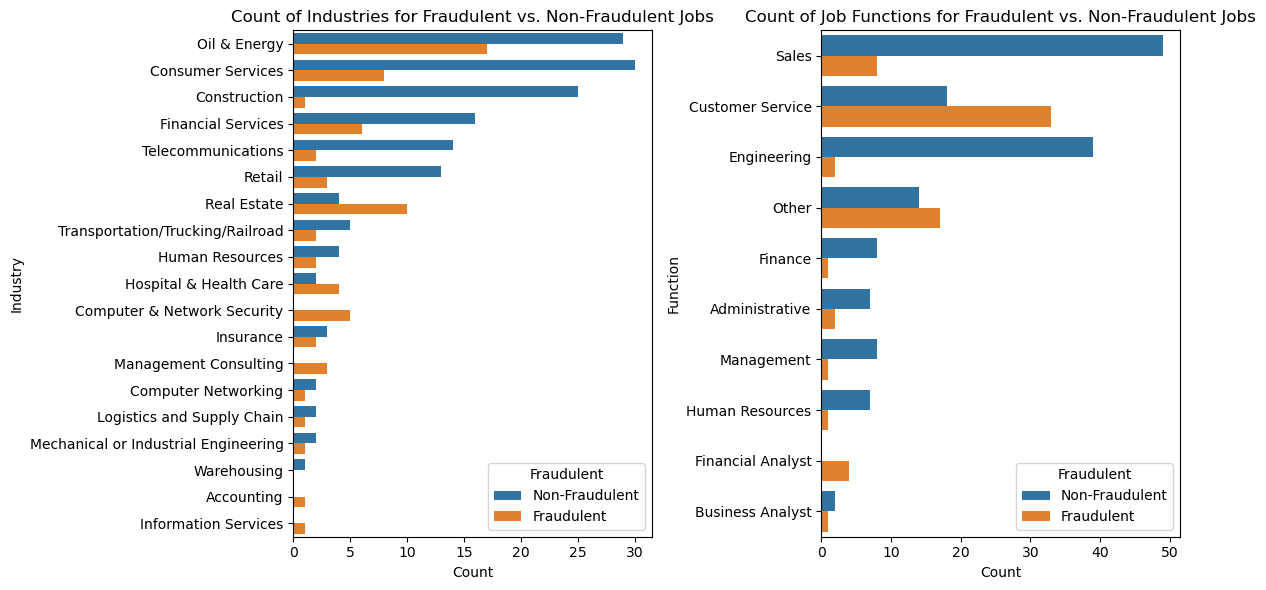

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique industries for fraudulent and non-fraudulent jobs
fraudulent_industries = set(data[data['fraudulent'] == 1]['industry'])
non_fraudulent_industries = set(data[data['fraudulent'] == 0]['industry'])

# Find industries common to both fraudulent and non-fraudulent jobs
overlapping_industries = fraudulent_industries.intersection(non_fraudulent_industries)
overlapping_industries.add('Missing_data')  # Add 'Missing_data' to the set of overlapping industries

# Get unique functions for fraudulent and non-fraudulent jobs
fraudulent_functions = set(data[data['fraudulent'] == 1]['function'])
non_fraudulent_functions = set(data[data['fraudulent'] == 0]['function'])

# Find functions common to both fraudulent and non-fraudulent jobs
overlapping_functions = fraudulent_functions.intersection(non_fraudulent_functions)

# Filter data to include only overlapping industries and functions
filtered_data = data[(data['industry'].isin(overlapping_industries)) & (data['function'].isin(overlapping_functions))]

# Create count plots with 'Missing_data' included for overlapping industries and functions
plt.figure(figsize=(12, 6))

# Count plot for industry
plt.subplot(1, 2, 1)
sns.countplot(y='industry', hue='fraudulent', data=filtered_data, order=filtered_data['industry'].value_counts().index)
plt.title('Count of Industries for Fraudulent vs. Non-Fraudulent Jobs')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])

# Count plot for function
plt.subplot(1, 2, 2)
sns.countplot(y='function', hue='fraudulent', data=filtered_data, order=filtered_data['function'].value_counts().index)
plt.title('Count of Job Functions for Fraudulent vs. Non-Fraudulent Jobs')
plt.xlabel('Count')
plt.ylabel('Function')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])

plt.tight_layout()
plt.show()


In [68]:
data

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary_lower,salary_upper
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",your responsibilities: manage the english-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000.0,28000.0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,Jungle Ventures is the leading Singapore based...,about vault dragon vault dragon is dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,120000.0,150000.0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,"WDM Group is an innovative, forward thinking d...",#url_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,100000.0,120000.0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,...,"ic&amp;e technician | bakersfield, ca mt. poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,95000.0,115000.0
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,Renewable Energy and Environmental Protection ...,the job is to support the growth of the #url_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0,15000.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,Gary Cartwright established Cartwright Propert...,we are seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1,30000.0,50000.0
17849,17850,Communication Designer,"US, CA, San Francisco",Design,Balanced Labs exists to provide accountants an...,balanced labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,80000.0,100000.0


C:\Users\Asus M16\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


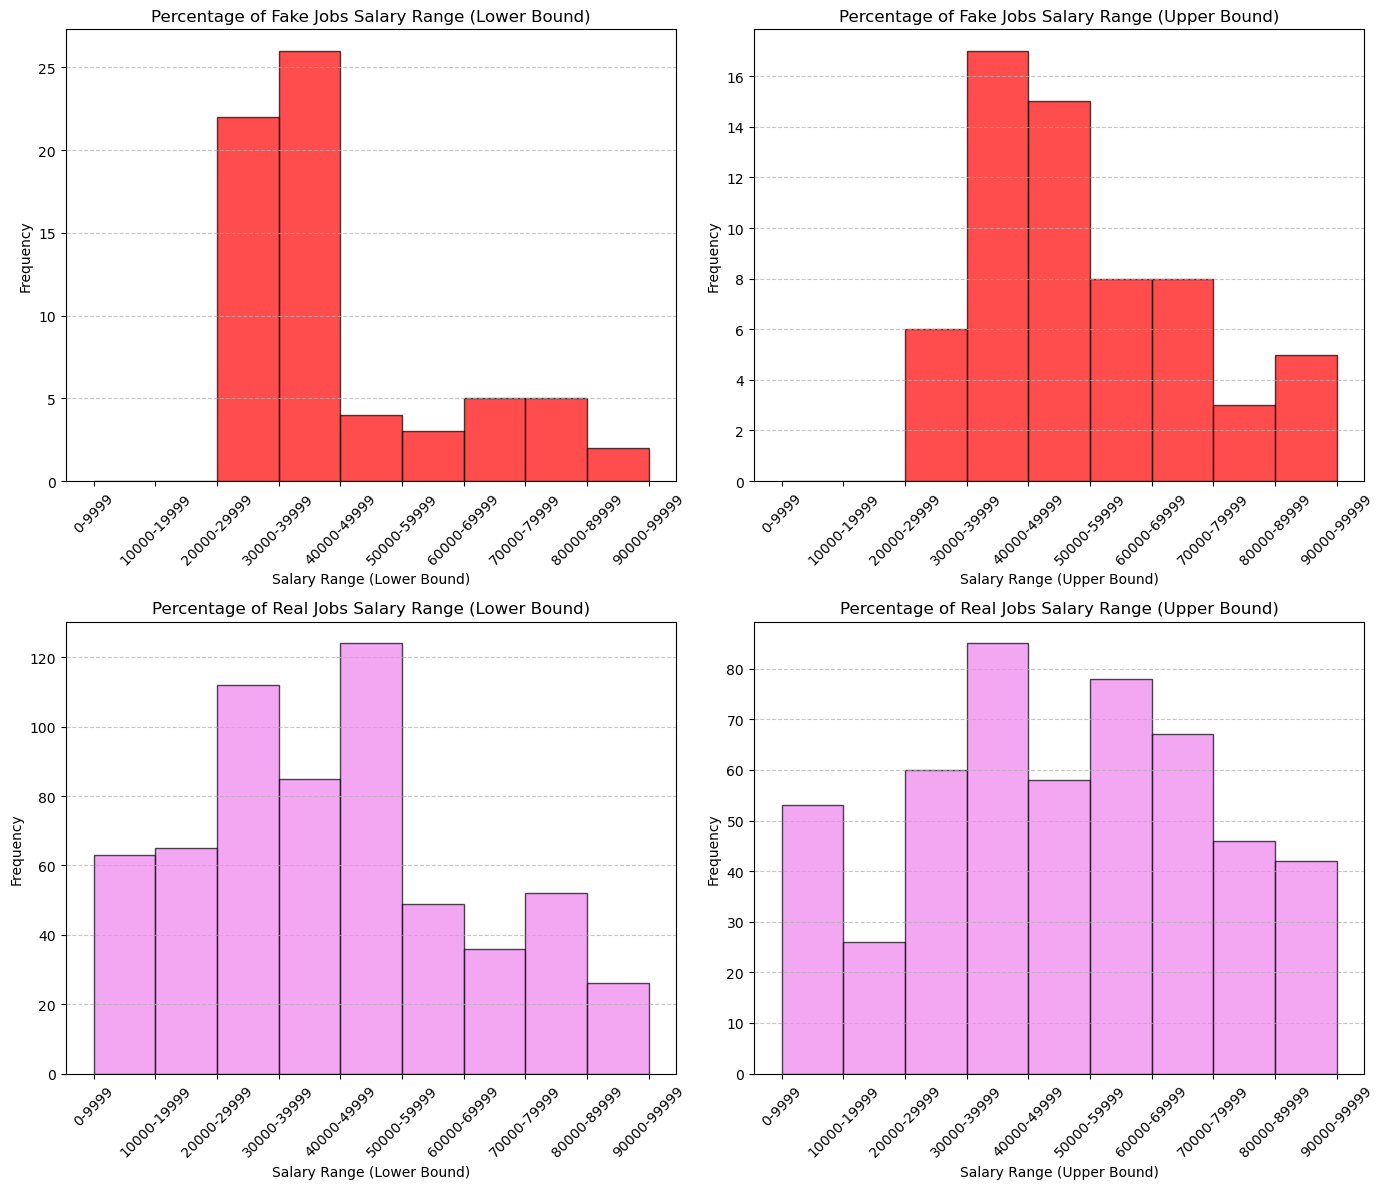

In [82]:
import matplotlib.pyplot as plt

# Filter data to include only fraudulent and non-fraudulent jobs
fraudulent_data = data[data['fraudulent'] == 1]
non_fraudulent_data = data[data['fraudulent'] == 0]

# Define salary ranges and corresponding bins
salary_ranges = ['0-9999', '10000-19999', '20000-29999', '30000-39999', '40000-49999', '50000-59999', '60000-69999', '70000-79999', '80000-89999', '90000-99999']
bins = [i*10000 for i in range(10)] + [float('inf')]  # Define bin edges

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot histogram for fraudulent jobs (salary_lower)
axs[0, 0].hist(fraudulent_data['salary_lower'], bins=bins, edgecolor='black', alpha=0.7, color='red')
axs[0, 0].set_title('Percentage of Fake Jobs Salary Range (Lower Bound)')
axs[0, 0].set_xlabel('Salary Range (Lower Bound)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xticks(bins[:-1])
axs[0, 0].set_xticklabels(salary_ranges, rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for fraudulent jobs (salary_upper)
axs[0, 1].hist(fraudulent_data['salary_upper'], bins=bins, edgecolor='black', alpha=0.7, color='red')
axs[0, 1].set_title('Percentage of Fake Jobs Salary Range (Upper Bound)')
axs[0, 1].set_xlabel('Salary Range (Upper Bound)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xticks(bins[:-1])
axs[0, 1].set_xticklabels(salary_ranges, rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for non-fraudulent jobs (salary_lower)
axs[1, 0].hist(non_fraudulent_data['salary_lower'], bins=bins, edgecolor='black', alpha=0.7, color='violet')
axs[1, 0].set_title('Percentage of Real Jobs Salary Range (Lower Bound)')
axs[1, 0].set_xlabel('Salary Range (Lower Bound)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xticks(bins[:-1])
axs[1, 0].set_xticklabels(salary_ranges, rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for non-fraudulent jobs (salary_upper)
axs[1, 1].hist(non_fraudulent_data['salary_upper'], bins=bins, edgecolor='black', alpha=0.7, color='violet')
axs[1, 1].set_title('Percentage of Real Jobs Salary Range (Upper Bound)')
axs[1, 1].set_xlabel('Salary Range (Upper Bound)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xticks(bins[:-1])
axs[1, 1].set_xticklabels(salary_ranges, rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [75]:
unique_required_experience = data['required_experience'].unique()
print(unique_required_experience)

['Mid-Senior level' 'Executive' 'Entry level' 'Associate' 'Not Applicable'
 'Director' 'Internship']


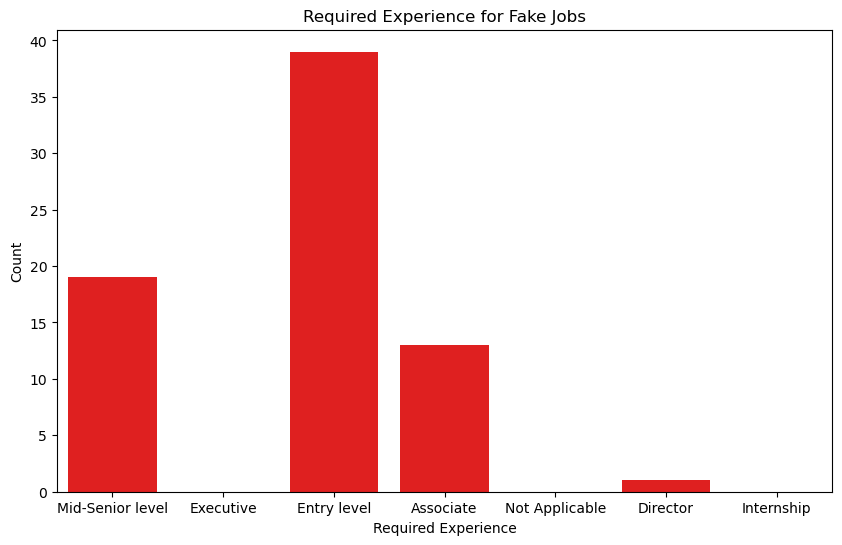

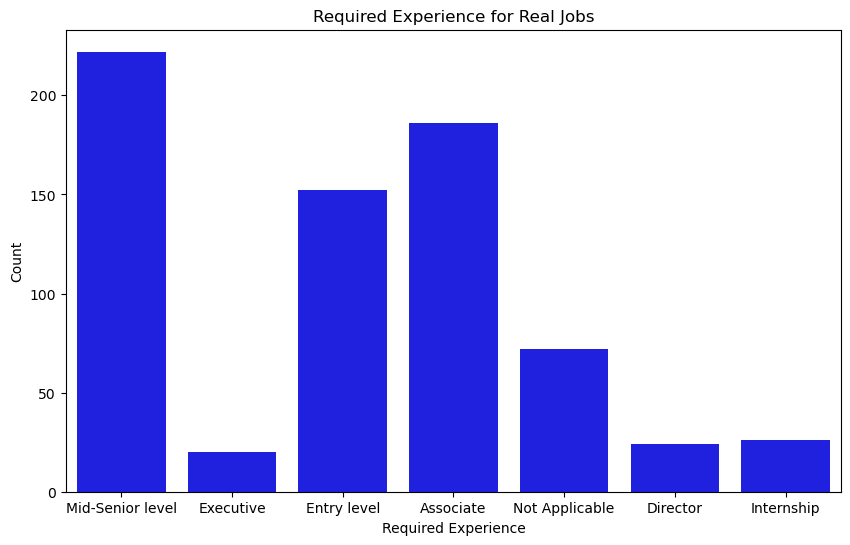

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the count plot for fake jobs
sns.countplot(data=fraudulent_data, x='required_experience', order=['Mid-Senior level', 'Executive', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship'], color='Red')
plt.title('Required Experience for Fake Jobs')
plt.xlabel('Required Experience')
plt.ylabel('Count')

# Show the plot
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the count plot for real jobs
sns.countplot(data=non_fraudulent_data, x='required_experience', order=['Mid-Senior level', 'Executive', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship'], color='Blue')
plt.title('Required Experience for Real Jobs')
plt.xlabel('Required Experience')
plt.ylabel('Count')

# Show the plot
plt.show()


In [86]:
unique_required_education = data['required_education'].unique()
print(unique_required_education)

["Master's Degree" "Bachelor's Degree" 'Unspecified'
 'High School or equivalent' 'Certification'
 'Some College Coursework Completed' 'Associate Degree' 'Vocational'
 'Vocational - HS Diploma' 'Professional']


required experience for fake jobs is mostly entry-level. Fake jobs target lower skilled workers.

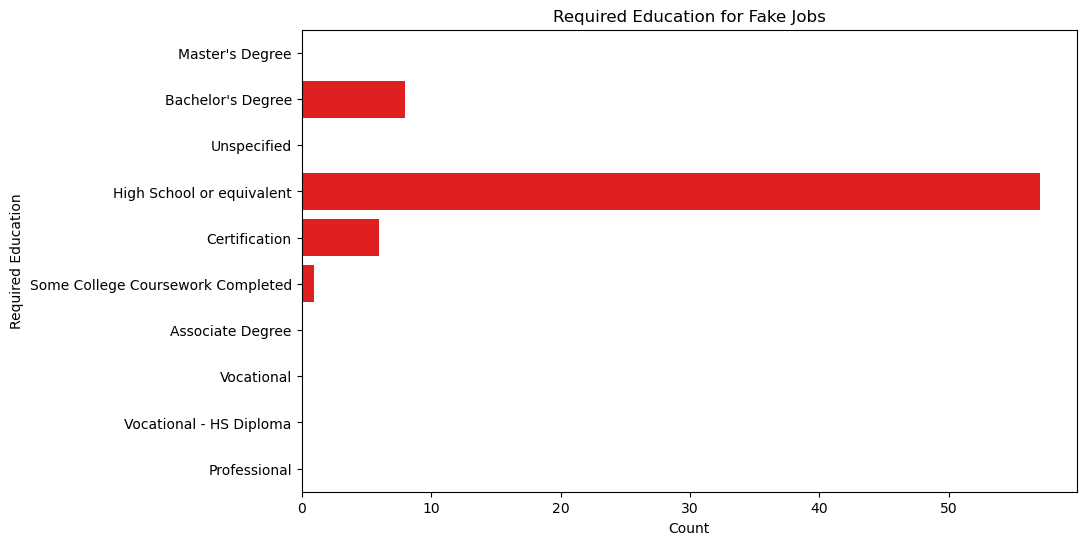

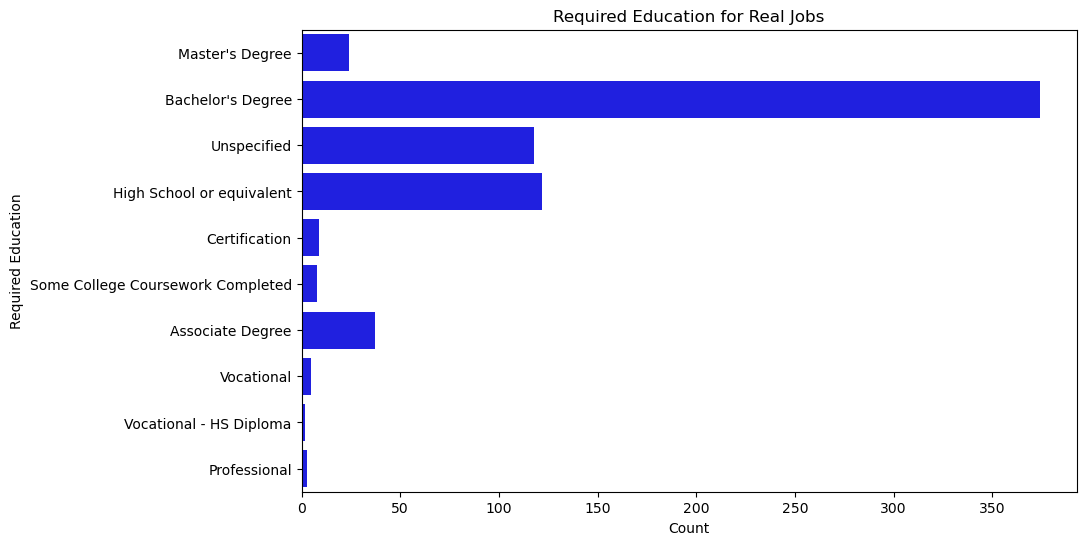

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the count plot for fake jobs (horizontal)
sns.countplot(data=fraudulent_data, y='required_education', order=["Master's Degree", "Bachelor's Degree", 'Unspecified', 'High School or equivalent', 'Certification', 'Some College Coursework Completed', 'Associate Degree', 'Vocational', 'Vocational - HS Diploma', 'Professional'], color='Red')
plt.title('Required Education for Fake Jobs')
plt.xlabel('Count')
plt.ylabel('Required Education')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the count plot for real jobs (horizontal)
sns.countplot(data=non_fraudulent_data, y='required_education', order=["Master's Degree", "Bachelor's Degree", 'Unspecified', 'High School or equivalent', 'Certification', 'Some College Coursework Completed', 'Associate Degree', 'Vocational', 'Vocational - HS Diploma', 'Professional'], color='Blue')
plt.title('Required Education for Real Jobs')
plt.xlabel('Count')
plt.ylabel('Required Education')

# Show the plot
plt.show()


Fake jobs target those less educated.